# Summarizes results of sequencing run for all 96 samples broken down by species and puts counts into a single file for each species with condition labels. 

## Resulting count file and metadata files are ready for use with the DeSEQ2 R package. 

In [3]:
# %load std_libraries.py
#to keep my scripts consistent, I am adding this to the top of all scripts with %load std_libraries.py
import sys
#Indicate operating environment and import core modules
location_input = input("what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = other")
location_dict = {'a': "C:\\Users\\BMH_work\\github\\expression_broad_data", 'b': "/home/heineike/github/expression_broad_data",
                 'c': "C:\\Users\\Ben\\Documents\\GitHub\\expression_broad_data", 'd':'you need to add your location to the location_dict'}
base_dir = location_dict[location_input]
print("base directory is " + base_dir)

if sys.path[-1] != base_dir:
    sys.path.append(base_dir)
    print("Added " + base_dir + " to path: " )
    print(sys.path)

import os

print("I am about to import a library")
#from core import expression_plots 
from core import io_library 
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
#%matplotlib inline
%matplotlib notebook
data_processing_dir = base_dir + os.sep + os.path.normpath("expression_data") + os.sep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.colormap as cm
#from matplotlib_venn import venn2
#import seaborn as sns; sns.set(style="ticks", color_codes=True)
#from sklearn import linear_model
#import pickle
#import subprocess
#import networkx as nx
#import scipy.stats as stats
#import statsmodels.graphics.gofplots as stats_graph
import scipy.cluster.hierarchy as sch

# from Bio import SeqIO
# from Bio import SeqFeature as sf
# from Bio.Alphabet import generic_dna
# from Bio.Seq import Seq

# import re

from collections import Counter
# import scipy.stats as stats
from itertools import chain
#from itertools import product
#this only works if you are online
online_input = input("are you online? Yes/No")
if online_input == "Yes": 
    import plotly.plotly as py
    import plotly.graph_objs as pygo
    import plotly.tools as pytools
    py.sign_in('heineike02_student','9dMTMZgJMgUP0YX0P5mQ')
#     #py.sign_in('heineike02', 'APPjKrtARaN2ZgUYIkqr')
    
# for phylogenetic trees: 
# from ete3 import Tree

#for scraping internet data (e.g. ncbi)
#import requests
#from lxml import etree    #parses xml output

what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = otherc
base directory is C:\Users\Ben\Documents\GitHub\expression_broad_data
I am about to import a library
I am importing io_library
what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = otherc
base directory is C:\Users\Ben\Documents\GitHub\expression_broad_data
data processing dir is C:\Users\Ben\Documents\GitHub\expression_broad_data\expression_data\
are you online? Yes/NoYes


In [11]:
#Used this routine once to rename files to have a shorter name because it was too long for windows to process. 
# dirlist = os.listdir('C:\\a\\')
# for directory in dirlist: 
#     print(directory)
#     new_directory = directory.split('_')[0]+'_'+directory.split('_')[1][2:]
#     print(new_directory)
#     os.rename('C:\\a\\' + directory, 'C:\\a\\' + new_directory)

KL_-B50_S50_L001_R1_001_fastq_gz-FWD_K_lactis__ASM251v1__Lexogen_QuantSeq_2_2_3-759b3db7-7fb6-4b4a-9d4a-27c8132fa919_output-folder
KL_50
KL_-B51_S51_L001_R1_001_fastq_gz-FWD_K_lactis__ASM251v1__Lexogen_QuantSeq_2_2_3-9af2d6a8-3beb-4869-946d-c3210040528e_output-folder
KL_51
KL_-B52_S52_L001_R1_001_fastq_gz-FWD_K_lactis__ASM251v1__Lexogen_QuantSeq_2_2_3-13106501-fd63-4f6e-be75-a3898185367a_output-folder
KL_52
KL_-B53_S53_L001_R1_001_fastq_gz-FWD_K_lactis__ASM251v1__Lexogen_QuantSeq_2_2_3-14d81bb8-378d-4ede-a9cc-36f530937466_output-folder
KL_53
KL_-B54_S54_L001_R1_001_fastq_gz-FWD_K_lactis__ASM251v1__Lexogen_QuantSeq_2_2_3-4c791190-9060-4e73-a19b-b681815261a8_output-folder
KL_54
KL_-B55_S55_L001_R1_001_fastq_gz-FWD_K_lactis__ASM251v1__Lexogen_QuantSeq_2_2_3-5fc81768-8559-4e0c-9ada-9c3677369f5d_output-folder
KL_55
KL_-B73_S73_L001_R1_001_fastq_gz-FWD_K_lactis__ASM251v1__Lexogen_QuantSeq_2_2_3-1158af99-1869-4fea-88dd-a7c13df6005d_output-folder
KL_73
KL_-B74_S74_L001_R1_001_fastq_gz-FWD_K_la

SC_-B68_S68_L001_R1_001_fastq_gz-FWD_S_cerevisiae__R64__Lexogen_QuantSeq_2_2_3-8bc14dc1-47b9-418d-bc83-e7e3baa2b226_output-folder
SC_68
SC_-B69_S69_L001_R1_001_fastq_gz-FWD_S_cerevisiae__R64__Lexogen_QuantSeq_2_2_3-19250de0-b660-4303-bdc7-8e06e197b60d_output-folder
SC_69
SC_-B70_S70_L001_R1_001_fastq_gz-FWD_S_cerevisiae__R64__Lexogen_QuantSeq_2_2_3-9c51b558-ab3d-4763-ba58-f9c1be6a6586_output-folder
SC_70
SC_-B71_S71_L001_R1_001_fastq_gz-FWD_S_cerevisiae__R64__Lexogen_QuantSeq_2_2_3-e2273123-4d38-4562-842a-4c87949d7e42_output-folder
SC_71
SC_-B72_S72_L001_R1_001_fastq_gz-FWD_S_cerevisiae__R64__Lexogen_QuantSeq_2_2_3-bb8ee654-e258-4cb1-80d4-c78ccd695de8_output-folder
SC_72
SC_-B76_S76_L001_R1_001_fastq_gz-FWD_S_cerevisiae__R64__Lexogen_QuantSeq_2_2_3-5bef9e65-13e5-4fbc-80a0-6c26073b827a_output-folder
SC_76
SC_-B77_S77_L001_R1_001_fastq_gz-FWD_S_cerevisiae__R64__Lexogen_QuantSeq_2_2_3-f7a65b09-5d04-432b-85b9-28e7314df0b2_output-folder
SC_77
SC_-B78_S78_L001_R1_001_fastq_gz-FWD_S_cerevisia

In [5]:
# #Used this routine to move my newly processed UTR files to the correct location. 
# from shutil import copy

# raw_data_base = "C:\\Users\\Ben\\Documents\\Data\\RNA_seq\\20181024_KL_SC_PKA_Msn24_Rph1Gis1\\dual_index\\BMH_HES_02\\"

# UTR_file_list = os.listdir(raw_data_base + 'counts_UTR' )


# print('transferring ' + str(len(UTR_file_list)) + ' files.')

# spec_to_transfer = 'KL'  #previously transferred all scer files

# for file in UTR_file_list: 
#     spec = file.split('_')[-2]
    
#     if spec == 'KL':
#         no = file.split('_')[-1].split('.')[0]
    
#         source_fname = os.path.normpath(raw_data_base + 'counts_UTR' + os.sep + file)
#         dest_fname = os.path.normpath(raw_data_base + '\\processed_data\\' + spec + '_' + no + '\\star_out\\B' + no + '_S' + str(int(no)) + '_L001_R1_001.fastq.gz\\read_counts_UTR.txt')  
#         print(source_fname)
#         print(dest_fname)
#         copy(source_fname,dest_fname)




transferring 96 files.
C:\Users\Ben\Documents\Data\RNA_seq\20181024_KL_SC_PKA_Msn24_Rph1Gis1\dual_index\BMH_HES_02\counts_UTR\read_counts_UTR_400_KL_17.txt
C:\Users\Ben\Documents\Data\RNA_seq\20181024_KL_SC_PKA_Msn24_Rph1Gis1\dual_index\BMH_HES_02\processed_data\KL_17\star_out\B17_S17_L001_R1_001.fastq.gz\read_counts_UTR.txt
C:\Users\Ben\Documents\Data\RNA_seq\20181024_KL_SC_PKA_Msn24_Rph1Gis1\dual_index\BMH_HES_02\counts_UTR\read_counts_UTR_400_KL_18.txt
C:\Users\Ben\Documents\Data\RNA_seq\20181024_KL_SC_PKA_Msn24_Rph1Gis1\dual_index\BMH_HES_02\processed_data\KL_18\star_out\B18_S18_L001_R1_001.fastq.gz\read_counts_UTR.txt
C:\Users\Ben\Documents\Data\RNA_seq\20181024_KL_SC_PKA_Msn24_Rph1Gis1\dual_index\BMH_HES_02\counts_UTR\read_counts_UTR_400_KL_19.txt
C:\Users\Ben\Documents\Data\RNA_seq\20181024_KL_SC_PKA_Msn24_Rph1Gis1\dual_index\BMH_HES_02\processed_data\KL_19\star_out\B19_S19_L001_R1_001.fastq.gz\read_counts_UTR.txt
C:\Users\Ben\Documents\Data\RNA_seq\20181024_KL_SC_PKA_Msn24_Rph1

C:\Users\Ben\Documents\Data\RNA_seq\20181024_KL_SC_PKA_Msn24_Rph1Gis1\dual_index\BMH_HES_02\counts_UTR\read_counts_UTR_400_KL_81.txt
C:\Users\Ben\Documents\Data\RNA_seq\20181024_KL_SC_PKA_Msn24_Rph1Gis1\dual_index\BMH_HES_02\processed_data\KL_81\star_out\B81_S81_L001_R1_001.fastq.gz\read_counts_UTR.txt
C:\Users\Ben\Documents\Data\RNA_seq\20181024_KL_SC_PKA_Msn24_Rph1Gis1\dual_index\BMH_HES_02\counts_UTR\read_counts_UTR_400_KL_82.txt
C:\Users\Ben\Documents\Data\RNA_seq\20181024_KL_SC_PKA_Msn24_Rph1Gis1\dual_index\BMH_HES_02\processed_data\KL_82\star_out\B82_S82_L001_R1_001.fastq.gz\read_counts_UTR.txt
C:\Users\Ben\Documents\Data\RNA_seq\20181024_KL_SC_PKA_Msn24_Rph1Gis1\dual_index\BMH_HES_02\counts_UTR\read_counts_UTR_400_KL_83.txt
C:\Users\Ben\Documents\Data\RNA_seq\20181024_KL_SC_PKA_Msn24_Rph1Gis1\dual_index\BMH_HES_02\processed_data\KL_83\star_out\B83_S83_L001_R1_001.fastq.gz\read_counts_UTR.txt
C:\Users\Ben\Documents\Data\RNA_seq\20181024_KL_SC_PKA_Msn24_Rph1Gis1\dual_index\BMH_HES

In [7]:
# # SC has annotation that uses the UTR as of 11/15/2018
# # KL has annotation that estimates 400bp as of 11/26/2018

# #extracts data from count files and stores in a new metadata file
# #also stores a file for each of species of the gene expression data.  
# #only need to run for initial data processing

# raw_data_dir = "C:\\Users\\Ben\\Documents\\Data\\RNA_seq\\20181024_KL_SC_PKA_Msn24_Rph1Gis1\\dual_index\\BMH_HES_02\\processed_data\\"
# raw_data_dirlist = os.listdir(raw_data_dir)

# #Make dataframe to store all metadata: 

# I7_index = [int('70' + str(sample_dir.split('_')[1]).zfill(2)) for sample_dir in raw_data_dirlist]

# #columns = ['spec', 'index'] + list(starLog.columns[ind_to_keep])
# #pd.DataFrame(index = index, columns = columns)
# metadata_df = pd.DataFrame(index = I7_index)


# countfile_metadata_names = ["__no_feature", "__ambiguous", "__too_low_aQual", "__not_aligned", "__alignment_not_unique"]


# #Make dataframe to store all count data by gene
# indices = {}

# #the first sample in the directory is a KL sample, the last one is an SC sample
# sample_dirs = {'KL': raw_data_dirlist[0], 
#             'SC': raw_data_dirlist[-1]}

# # read_counts_fnames = {'KL' : 'read_counts.txt',
# #                      'SC' : 'read_counts_UTR.txt'}

# read_counts_fname = 'read_counts_UTR.txt'

# countdata_df_dict = {}

# for spec, sample_dir in sample_dirs.items():

#     #Get index by species
    
#     #If the read count filenames are different use this: 
#     #read_counts_fname = read_counts_fnames[spec]

#     index_base = sample_dir.split('_')[1]
#     index = int('70' + index_base)

#     #Extract data from read_counts.txt
#     star_dir = os.path.normpath('star_out\\B' + index_base + '_S' + str(int(index_base)) + '_L001_R1_001.fastq.gz') + os.sep
#     print(star_dir)
#     read_counts = pd.read_table(raw_data_dir + sample_dir + os.sep + star_dir + read_counts_fname, header = None, index_col=0)
#     spec_index = read_counts.drop(labels = countfile_metadata_names,axis=0).index

#     spec_countdata = pd.DataFrame(index=spec_index)

#     countdata_df_dict[spec] = spec_countdata




# spec_list = []
# starLog_data_out_dict = {}
# read_counts_metadata_dict = {}

# for sample_dir in raw_data_dirlist: 
#     spec = sample_dir.split('_')[0]
#     spec_list.append(spec)

#     #If the read count filenames are different use this: 
#     #read_counts_fname = read_counts_fnames[spec]
    
#     index_base = sample_dir.split('_')[1]
#     index = int('70' + index_base)

#     #Extract metadata from starLog.final.out
#     star_dir = os.path.normpath('star_out\\B' + index_base + '_S' + str(int(index_base)) + '_L001_R1_001.fastq.gz') + os.sep

#     starLog = pd.read_table(raw_data_dir + sample_dir + os.sep + star_dir + 'starLog.final.out', index_col = 0, header = None).T

#     ind_to_keep = [4,5]+list(range(7,21)) + list(range(22,26))+list(range(27,30))+[31,32]

#     starLog_data_out = starLog[starLog.columns[ind_to_keep]]

#     starLog_data_out_dict[index] = starLog_data_out.values[0]


#     #Extract data from read_counts.txt or read_counts_UTR.txt
#     read_counts = pd.read_table(raw_data_dir + sample_dir + os.sep + star_dir + read_counts_fname, header = None, index_col=0)
    
#     read_counts_metadata_dict[index] = list(read_counts.loc[countfile_metadata_names][1].values) + list(read_counts.drop(labels = countfile_metadata_names,axis=0).sum().values)
    
#     #store data in correct dataframe
#     countdata_df = countdata_df_dict[spec]
#     countdata_df[index] = read_counts.drop(labels = countfile_metadata_names,axis=0)
    
    

# #add species to metadata dataframe
# metadata_df['spec'] = spec_list

# #integrate metadata from starLog
# starLog_data_df = pd.DataFrame.from_dict(starLog_data_out_dict, orient='index', columns = starLog_data_out.columns)
# metadata_df = metadata_df.merge(starLog_data_df, left_index=True, right_index=True, how = 'inner')

# #integrate metadata from count files
# read_counts_metadata_df = pd.DataFrame.from_dict(read_counts_metadata_dict, orient = 'index', columns = countfile_metadata_names + ['total_reads_w_features'] )
# metadata_df = metadata_df.merge(read_counts_metadata_df, left_index=True, right_index=True, how = 'inner')

# #import my pre-sequencing metadata file and merge
# metadata_preseq = pd.read_csv(data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017\\20181017_metadata_V2.csv'))

# metadata_df = metadata_df.merge(metadata_preseq, left_index = True, right_on = 'I7 index', how = 'left')

# #convert percentages of mapped reads and number of input reads
# metadata_df['Uniquely mapped reads %'] = [float(item.split('%')[0]) for item in metadata_df['                        Uniquely mapped reads % |']]
# metadata_df['Number of input reads'] = [int(item) for item in metadata_df['                          Number of input reads |']]

# #make columns for pct of reads not assigned to gene features for various reasons
# metadata_df['pct not aligned to feature'] = metadata_df['__no_feature'].divide(metadata_df['Number of input reads'])
# metadata_df['pct alignment not unique'] = metadata_df['__alignment_not_unique'].divide(metadata_df['Number of input reads'])
# metadata_df['pct ambiguous'] = metadata_df['__ambiguous'].divide(metadata_df['Number of input reads'])

# metadata_df.to_csv(data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017\\20181017_metadata_V2p2_postseq.csv'))

# for spec, countdata_df in countdata_df_dict.items():
#     countdata_df.to_csv(data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017\\20181017_countdata_' + spec + '.csv'))


star_out\B17_S17_L001_R1_001.fastq.gz\
star_out\B96_S96_L001_R1_001.fastq.gz\


In [9]:
#Load metadata and countdata files

metadata_df = pd.read_csv(data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017\\20181017_metadata_V2p2_postseq.csv'), index_col = 0)
metadata_df.set_index('I7 index', inplace=True)

countdata_df_dict = {}

for spec in ['SC', 'KL']: 
    countdata_df_dict[spec] = pd.read_csv(data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017\\20181017_countdata_' + spec + '.csv'), index_col = 0)
    

In [10]:
#adjust datasets based on QC: 

#remove SC: 
#7077 low counts, lots of unmapped reads and isn't clustering well 
#7073 name mix up - not sure what the sample is. clusters with WT, RG/M24/RGM24, +drug

#remove from countdata
countdata_postQC = {}
column_drop_dict = {'SC': ['7077','7073']}

for spec, countdata_df in countdata_df_dict.items():
    countdata_postQC_spec = countdata_df.copy()
    
    #only drops columns if the species has columns to drop
    if spec in column_drop_dict.keys():
        countdata_postQC_spec = countdata_df.drop(columns = column_drop_dict[spec])       
    countdata_postQC[spec] = countdata_postQC_spec
    countdata_postQC_spec.to_csv(data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017\\20181017_countdata_postQC_' + spec + '.csv')) 
    
#remove from metadata
all_samples_to_drop = [int(ind) for ind in list(chain.from_iterable(list(column_drop_dict.values())))]
metadata_postQC = metadata_df.drop(index = all_samples_to_drop)

metadata_postQC.to_csv(data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017\\20181017_metadata_postQC.csv'))   


In [4]:
#Build metadata file for DEseq2

metadata_postQC = pd.read_csv(data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017\\20181017_metadata_postQC.csv'), index_col = 0)

countdata_postQC = {}

for spec in ['SC', 'KL']: 
    countdata_postQC[spec] = pd.read_csv(data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017\\20181017_countdata_postQC_' + spec + '.csv'), index_col = 0)

for spec in ['SC', 'KL']: 
    metadata_spec = metadata_postQC[metadata_postQC['spec']==spec]
    
    deseq_metadata_spec = pd.DataFrame(index=metadata_spec.index, columns = ['pka_AS_mut','tf_del','NMPP1','replicate'])
    deseq_metadata_spec['pka_AS_mut']= metadata_spec['AS/WT']
    deseq_metadata_spec['tf_del']= metadata_spec['Deletions']
    deseq_metadata_spec['NMPP1']= metadata_spec['Condition']
    deseq_metadata_spec['replicate']= metadata_spec['Rep']
    
    #For S.Cer swap 
    
    deseq_metadata_spec.to_csv(data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017\\20181017_metadata_deseq_' + spec + '.csv'))

<IPython.core.display.Javascript object>


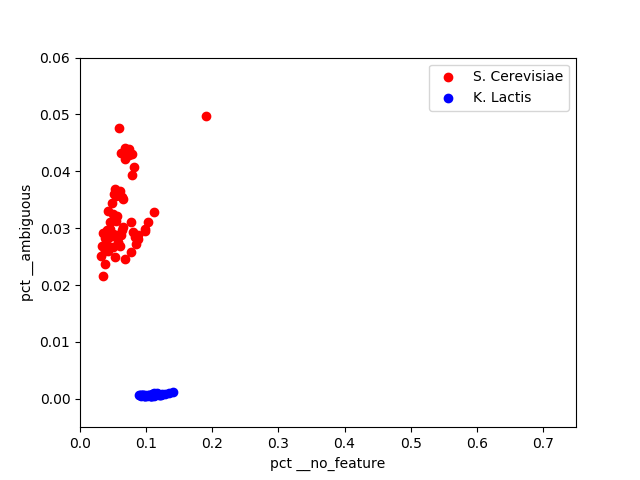

In [11]:
#PLot pct no feature v.s. pct alignment not unique for each species


#columns_to_view = ['__no_feature', '__ambiguous', '__too_low_aQual', '__not_aligned', '__alignment_not_unique','long_name', 'pct not aligned to feature', 'pct alignment not unique', 'Number of input reads',  '                   Uniquely mapped reads number |', 'total_reads_w_features']
#metadata_df[columns_to_view]

fig, ax = plt.subplots(1,1)

colordict = {'SC': 'r', 'KL': 'b'}

for spec in ['SC', 'KL']: 
    metadata_df_spec = metadata_df[metadata_df['spec']==spec]
    ax.scatter(metadata_df_spec['pct not aligned to feature'], metadata_df_spec['pct ambiguous'], c = colordict[spec])
    
ax.set_xlabel('pct __no_feature')
ax.set_ylabel('pct __ambiguous')
ax.set_xlim([0,0.75])
ax.set_ylim([-0.005,0.06])
ax.legend(['S. Cerevisiae','K. Lactis'])

<IPython.core.display.Javascript object>


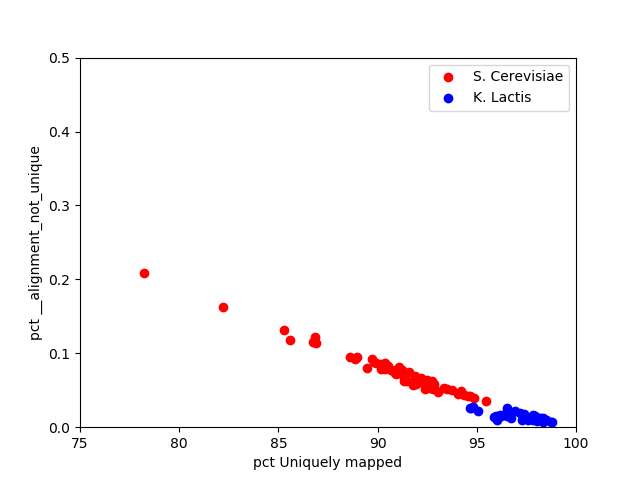

In [12]:
fig, ax = plt.subplots(1,1)

colordict = {'SC': 'r', 'KL': 'b'}

for spec in ['SC', 'KL']: 
    metadata_df_spec = metadata_df[metadata_df['spec']==spec]
    ax.scatter(metadata_df_spec['Uniquely mapped reads %'], metadata_df_spec['pct alignment not unique'], c = colordict[spec])
    
ax.set_xlabel('pct Uniquely mapped')
ax.set_ylabel('pct __alignment_not_unique')
ax.set_xlim([75,100])
ax.set_ylim([0.0,0.5])
ax.legend(['S. Cerevisiae','K. Lactis'])

<IPython.core.display.Javascript object>


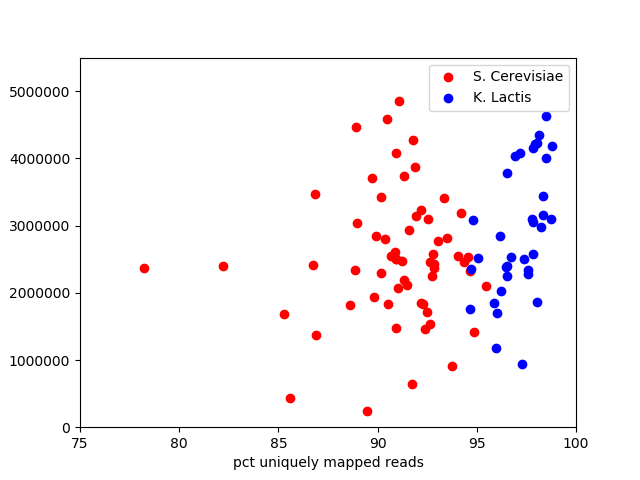

In [13]:
#Metadata: Plot uniquely mapped reads v.s. total number of reads
#this would be better if I had condition, background and species labeled. 

fig, ax = plt.subplots(1,1)

colordict = {'SC': 'r', 'KL': 'b'}

for spec in ['SC', 'KL']: 
    metadata_df_spec = metadata_df[metadata_df['spec']==spec]
    unique_map_pct = metadata_df_spec['Uniquely mapped reads %']
    nreads = metadata_df_spec['Number of input reads']
    ax.scatter(unique_map_pct, nreads, color = colordict[spec])

ax.set_xlabel('pct uniquely mapped reads')
ax.set_ylabel('N reads')
ax.set_xlim([75,100])
ax.set_ylim([0,5500000])
ax.legend(['S. Cerevisiae','K. Lactis'])

<IPython.core.display.Javascript object>


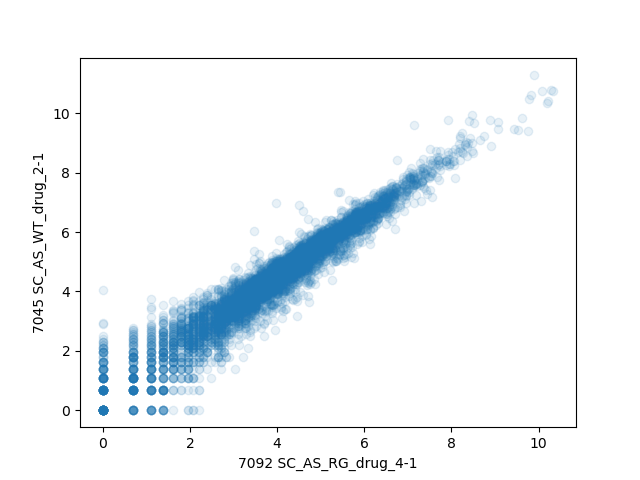

C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in log



Text(0,0.5,'7045 SC_AS_WT_drug_2-1')

In [39]:
#A few example correlations
fig, ax = plt.subplots(1,1)

ax.scatter(np.log(countdata_df_dict['KL'].loc[:,'7092']), np.log(countdata_df_dict['SC'].loc[:,'7045']), alpha = 0.1)
ax.set_xlabel('7092 SC_AS_RG_drug_4-1')
ax.set_ylabel('7045 SC_AS_WT_drug_2-1')


<IPython.core.display.Javascript object>


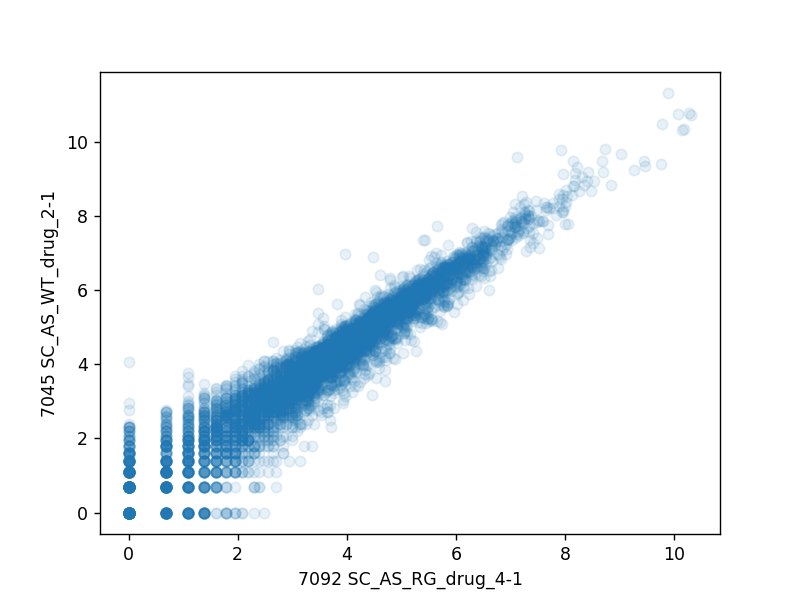

C:\Users\BMH_work\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in log



Text(0,0.5,'7045 SC_AS_WT_drug_2-1')

In [101]:
#A few example correlations
fig, ax = plt.subplots(1,1)

ax.scatter(np.log(countdata_df_dict['SC'].loc[:,'7092']), np.log(countdata_df_dict['SC'].loc[:,'7045']), alpha = 0.1)
ax.set_xlabel('7092 SC_AS_RG_drug_4-1')
ax.set_ylabel('7045 SC_AS_WT_drug_2-1')


<IPython.core.display.Javascript object>


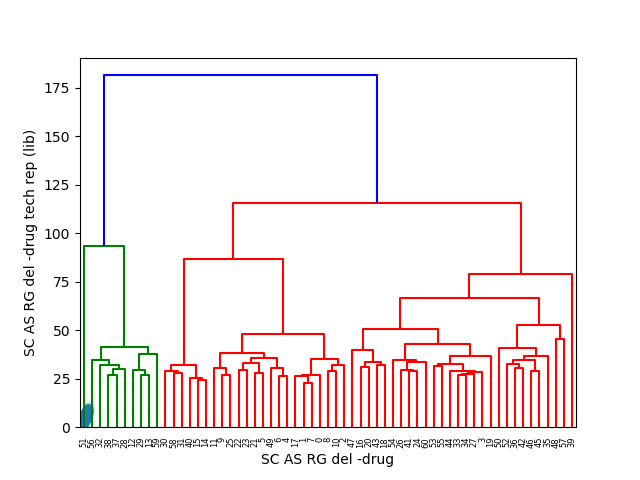

C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning:

divide by zero encountered in log



Text(0,0.5,'SC AS RG del -drug tech rep (lib)')

In [41]:
fig, ax = plt.subplots(1,1)

ax.scatter(np.log(countdata_df_dict['SC'].loc[:,'7042']), np.log(countdata_df_dict['SC'].loc[:,'7078']), alpha = 0.1)
ax.set_xlabel('SC AS RG del -drug')
ax.set_ylabel('SC AS RG del -drug tech rep (lib)')

<IPython.core.display.Javascript object>


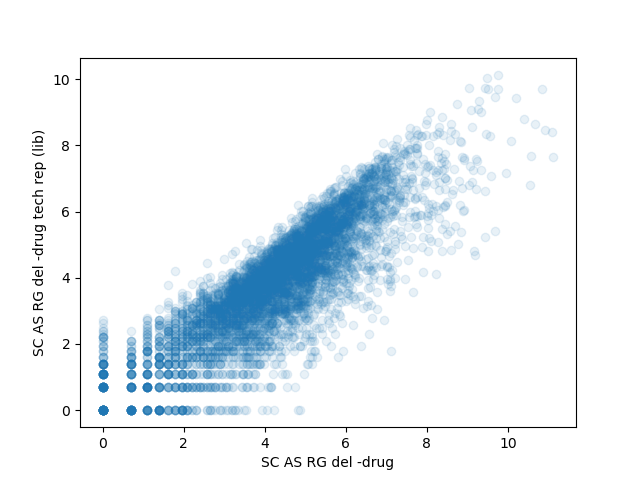

C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'SC AS RG del -drug tech rep (lib)')

In [234]:
fig, ax = plt.subplots(1,1)

ax.scatter(np.log(countdata_df_dict['SC'].loc[:,7042]), np.log(countdata_df_dict['SC'].loc[:,7078]), alpha = 0.1)
ax.set_xlabel('SC AS RG del -drug')
ax.set_ylabel('SC AS RG del -drug tech rep (lib)')

<IPython.core.display.Javascript object>


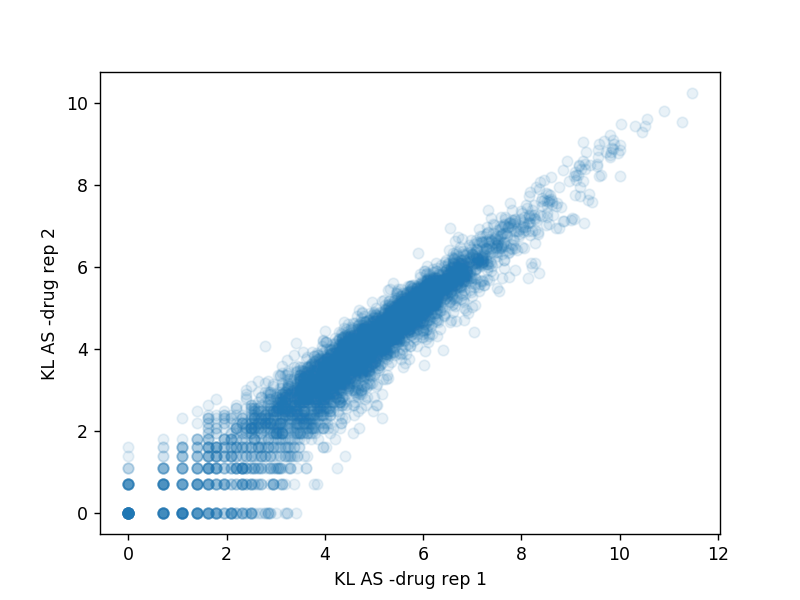

C:\Users\BMH_work\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning:

divide by zero encountered in log



Text(0,0.5,'KL AS -drug rep 2')

In [4]:
fig, ax = plt.subplots(1,1)

ax.scatter(np.log(countdata_df_dict['KL'].loc[:,'7018']), np.log(countdata_df_dict['KL'].loc[:,'7080']), alpha = 0.1)
ax.set_xlabel('KL AS -drug rep 1')
ax.set_ylabel('KL AS -drug rep 2')

C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning:

divide by zero encountered in log10



<IPython.core.display.Javascript object>


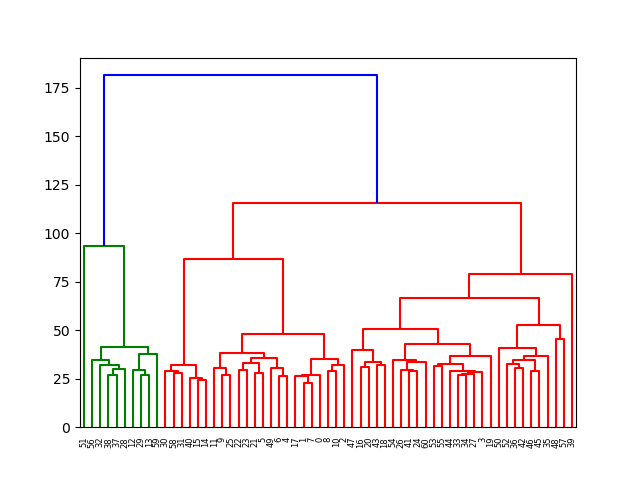

<IPython.core.display.Javascript object>


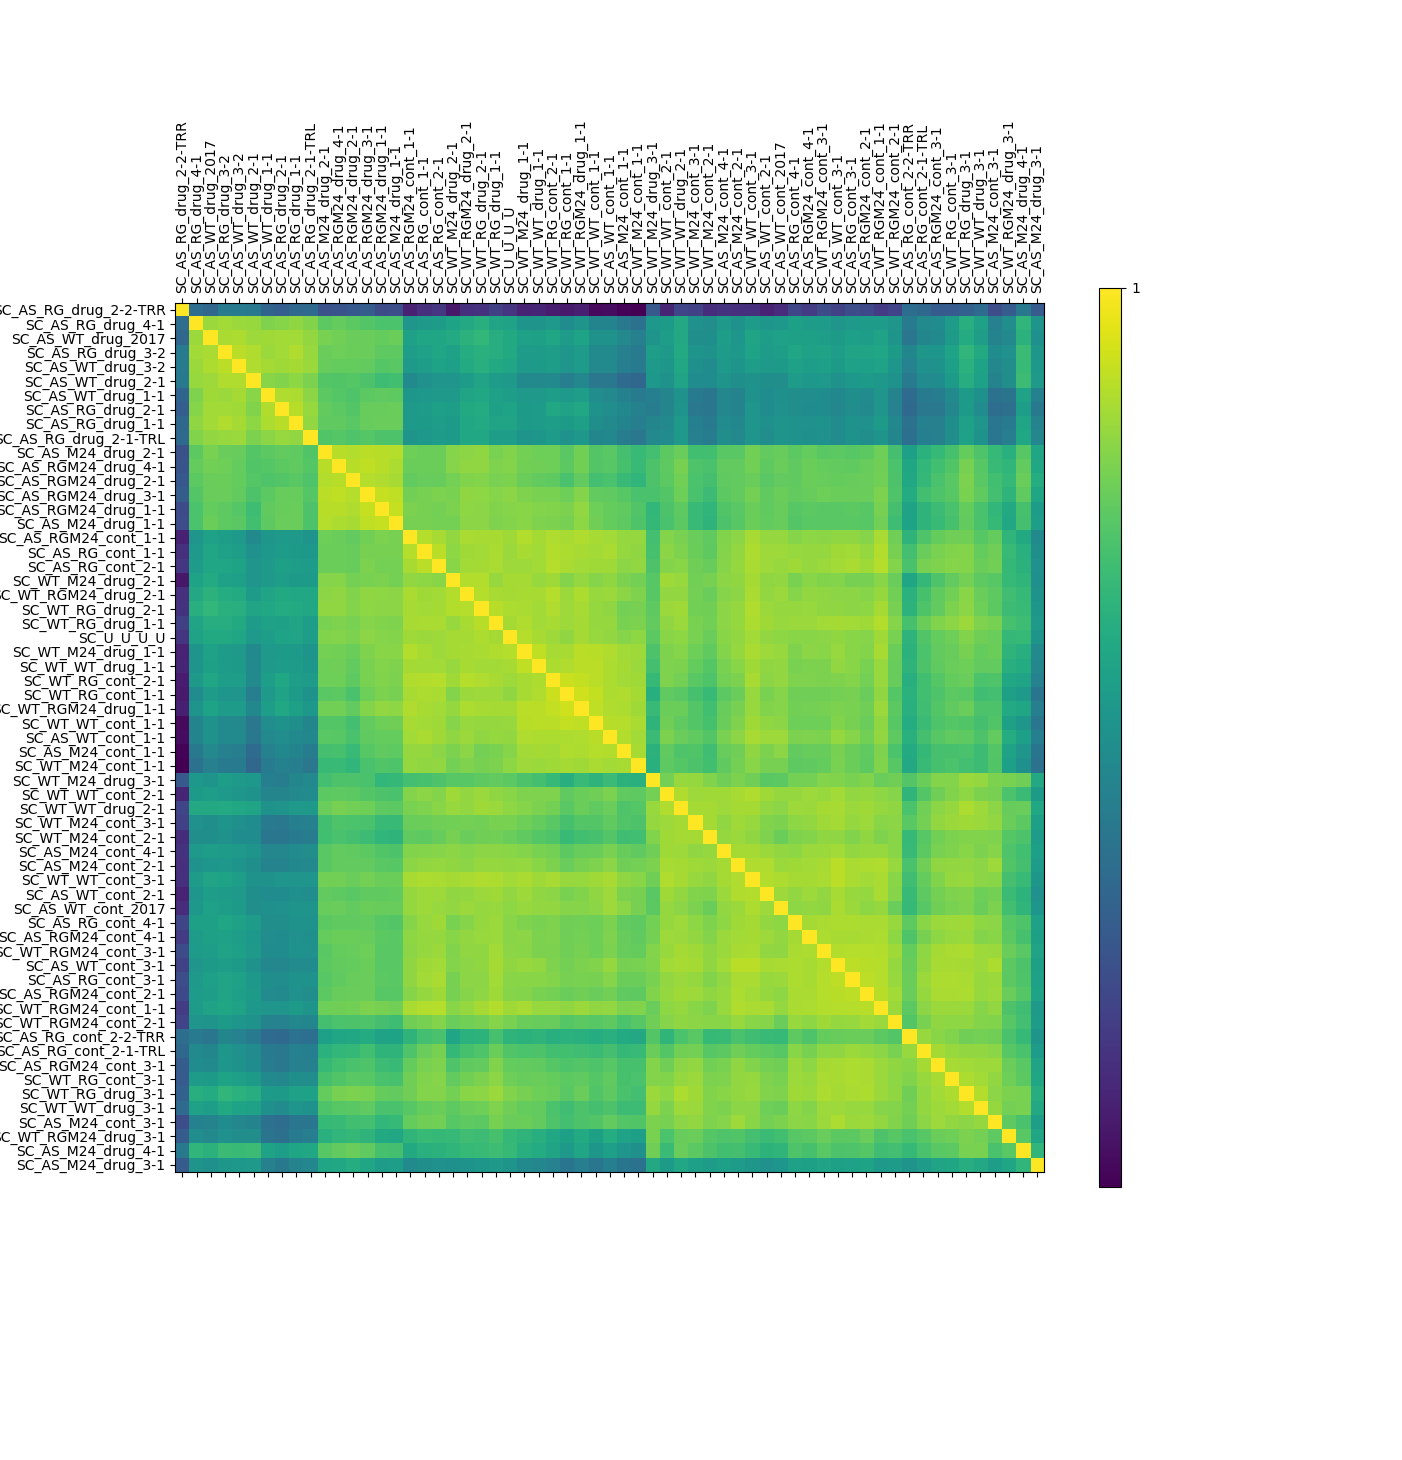

In [6]:
#Correlation heatmap for SC - columns/rows ordered based on heirarchical clustering. 

spec = 'SC'
countdata_df = countdata_df_dict[spec]

#normalize by total read number, add pseudocount of 0.1, take log10
total_counts = countdata_df.sum()
total_count_med = total_counts.median()
total_count_max = total_counts.max()
pseudocount = 0.1/total_count_max   #I am using 0.1 times 1/the largest number of counts for a pseudocount ( it all gets multiplied by the median number of counts so all is on the same scale) - thus the pseudocount is 0.1 * the smallest possible value for a single read. 

countdata_df_norm = countdata_df.copy()
for column in countdata_df_norm: 
    countdata_df_norm[column] = (countdata_df[column]/total_counts[column] + pseudocount)*total_count_med
    countdata_df_norm_log = np.log10(countdata_df_norm)

#also tried clustering with average method and correlation as the metric, but it didn't look as good. 
exp_cluster = sch.linkage(countdata_df_norm_log.values.T, method = 'ward', metric = 'euclidean', optimal_ordering=True)
col_dend = sch.dendrogram(exp_cluster)
col_ind_reorder = col_dend['leaves']

old_cols = countdata_df_norm_log.columns.tolist()
new_cols = [old_cols[ind] for ind in col_ind_reorder]

countdata_df_norm_log_clustered = countdata_df_norm_log[new_cols]

# Compute the correlation matrix for the received dataframe
corr = countdata_df_norm_log_clustered.corr()

# Plot the correlation matrix

#for linking column to names
name_dict = metadata_df['long_name'].to_dict()

#for checking to see if clustering correlates with preparation round
prep_round_dict = {}
for index, item in metadata_df[['RNA Extraction', 'RNA Extraction round 2','Library Prep round']].iterrows():
    prep_round_dict[index] = str(item[0]) + '_' + str(item[1]) + '_' + str(item[2])
prep_round_dict

label_lookup = name_dict #prep_round_dict #name_dict
column_names = [label_lookup[int(col)] for col in corr.columns]


fig, ax = plt.subplots()
cax = ax.matshow(corr, cmap='viridis')
plt.xticks(range(len(corr.columns)), column_names, rotation=90);
plt.yticks(range(len(corr.columns)), column_names);

# Add the colorbar legend
cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)

In [7]:
for jj in range(len(corr)): 
    print(corr.columns[jj] + '\t' + column_names[jj])

7077	SC_AS_RG_drug_2-2-TRR
7092	SC_AS_RG_drug_4-1
7056	SC_AS_WT_drug_2017
7062	SC_AS_RG_drug_3-2
7061	SC_AS_WT_drug_3-2
7045	SC_AS_WT_drug_2-1
7013	SC_AS_WT_drug_1-1
7046	SC_AS_RG_drug_2-1
7014	SC_AS_RG_drug_1-1
7095	SC_AS_RG_drug_2-1-TRL
7047	SC_AS_M24_drug_2-1
7094	SC_AS_RGM24_drug_4-1
7048	SC_AS_RGM24_drug_2-1
7064	SC_AS_RGM24_drug_3-1
7016	SC_AS_RGM24_drug_1-1
7015	SC_AS_M24_drug_1-1
7012	SC_AS_RGM24_cont_1-1
7010	SC_AS_RG_cont_1-1
7042	SC_AS_RG_cont_2-1
7039	SC_WT_M24_drug_2-1
7040	SC_WT_RGM24_drug_2-1
7038	SC_WT_RG_drug_2-1
7006	SC_WT_RG_drug_1-1
7073	SC_U_U_U_U
7007	SC_WT_M24_drug_1-1
7005	SC_WT_WT_drug_1-1
7034	SC_WT_RG_cont_2-1
7002	SC_WT_RG_cont_1-1
7008	SC_WT_RGM24_drug_1-1
7001	SC_WT_WT_cont_1-1
7009	SC_AS_WT_cont_1-1
7011	SC_AS_M24_cont_1-1
7003	SC_WT_M24_cont_1-1
7071	SC_WT_M24_drug_3-1
7033	SC_WT_WT_cont_2-1
7037	SC_WT_WT_drug_2-1
7067	SC_WT_M24_cont_3-1
7035	SC_WT_M24_cont_2-1
7090	SC_AS_M24_cont_4-1
7043	SC_AS_M24_cont_2-1
7065	SC_WT_WT_cont_3-1
7041	SC_AS_WT_cont_2-1


C:\Users\BMH_work\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning:

divide by zero encountered in log10



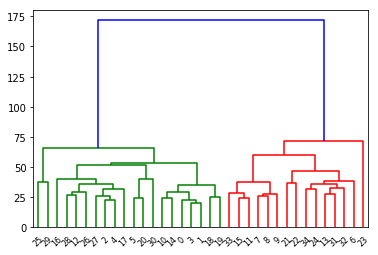

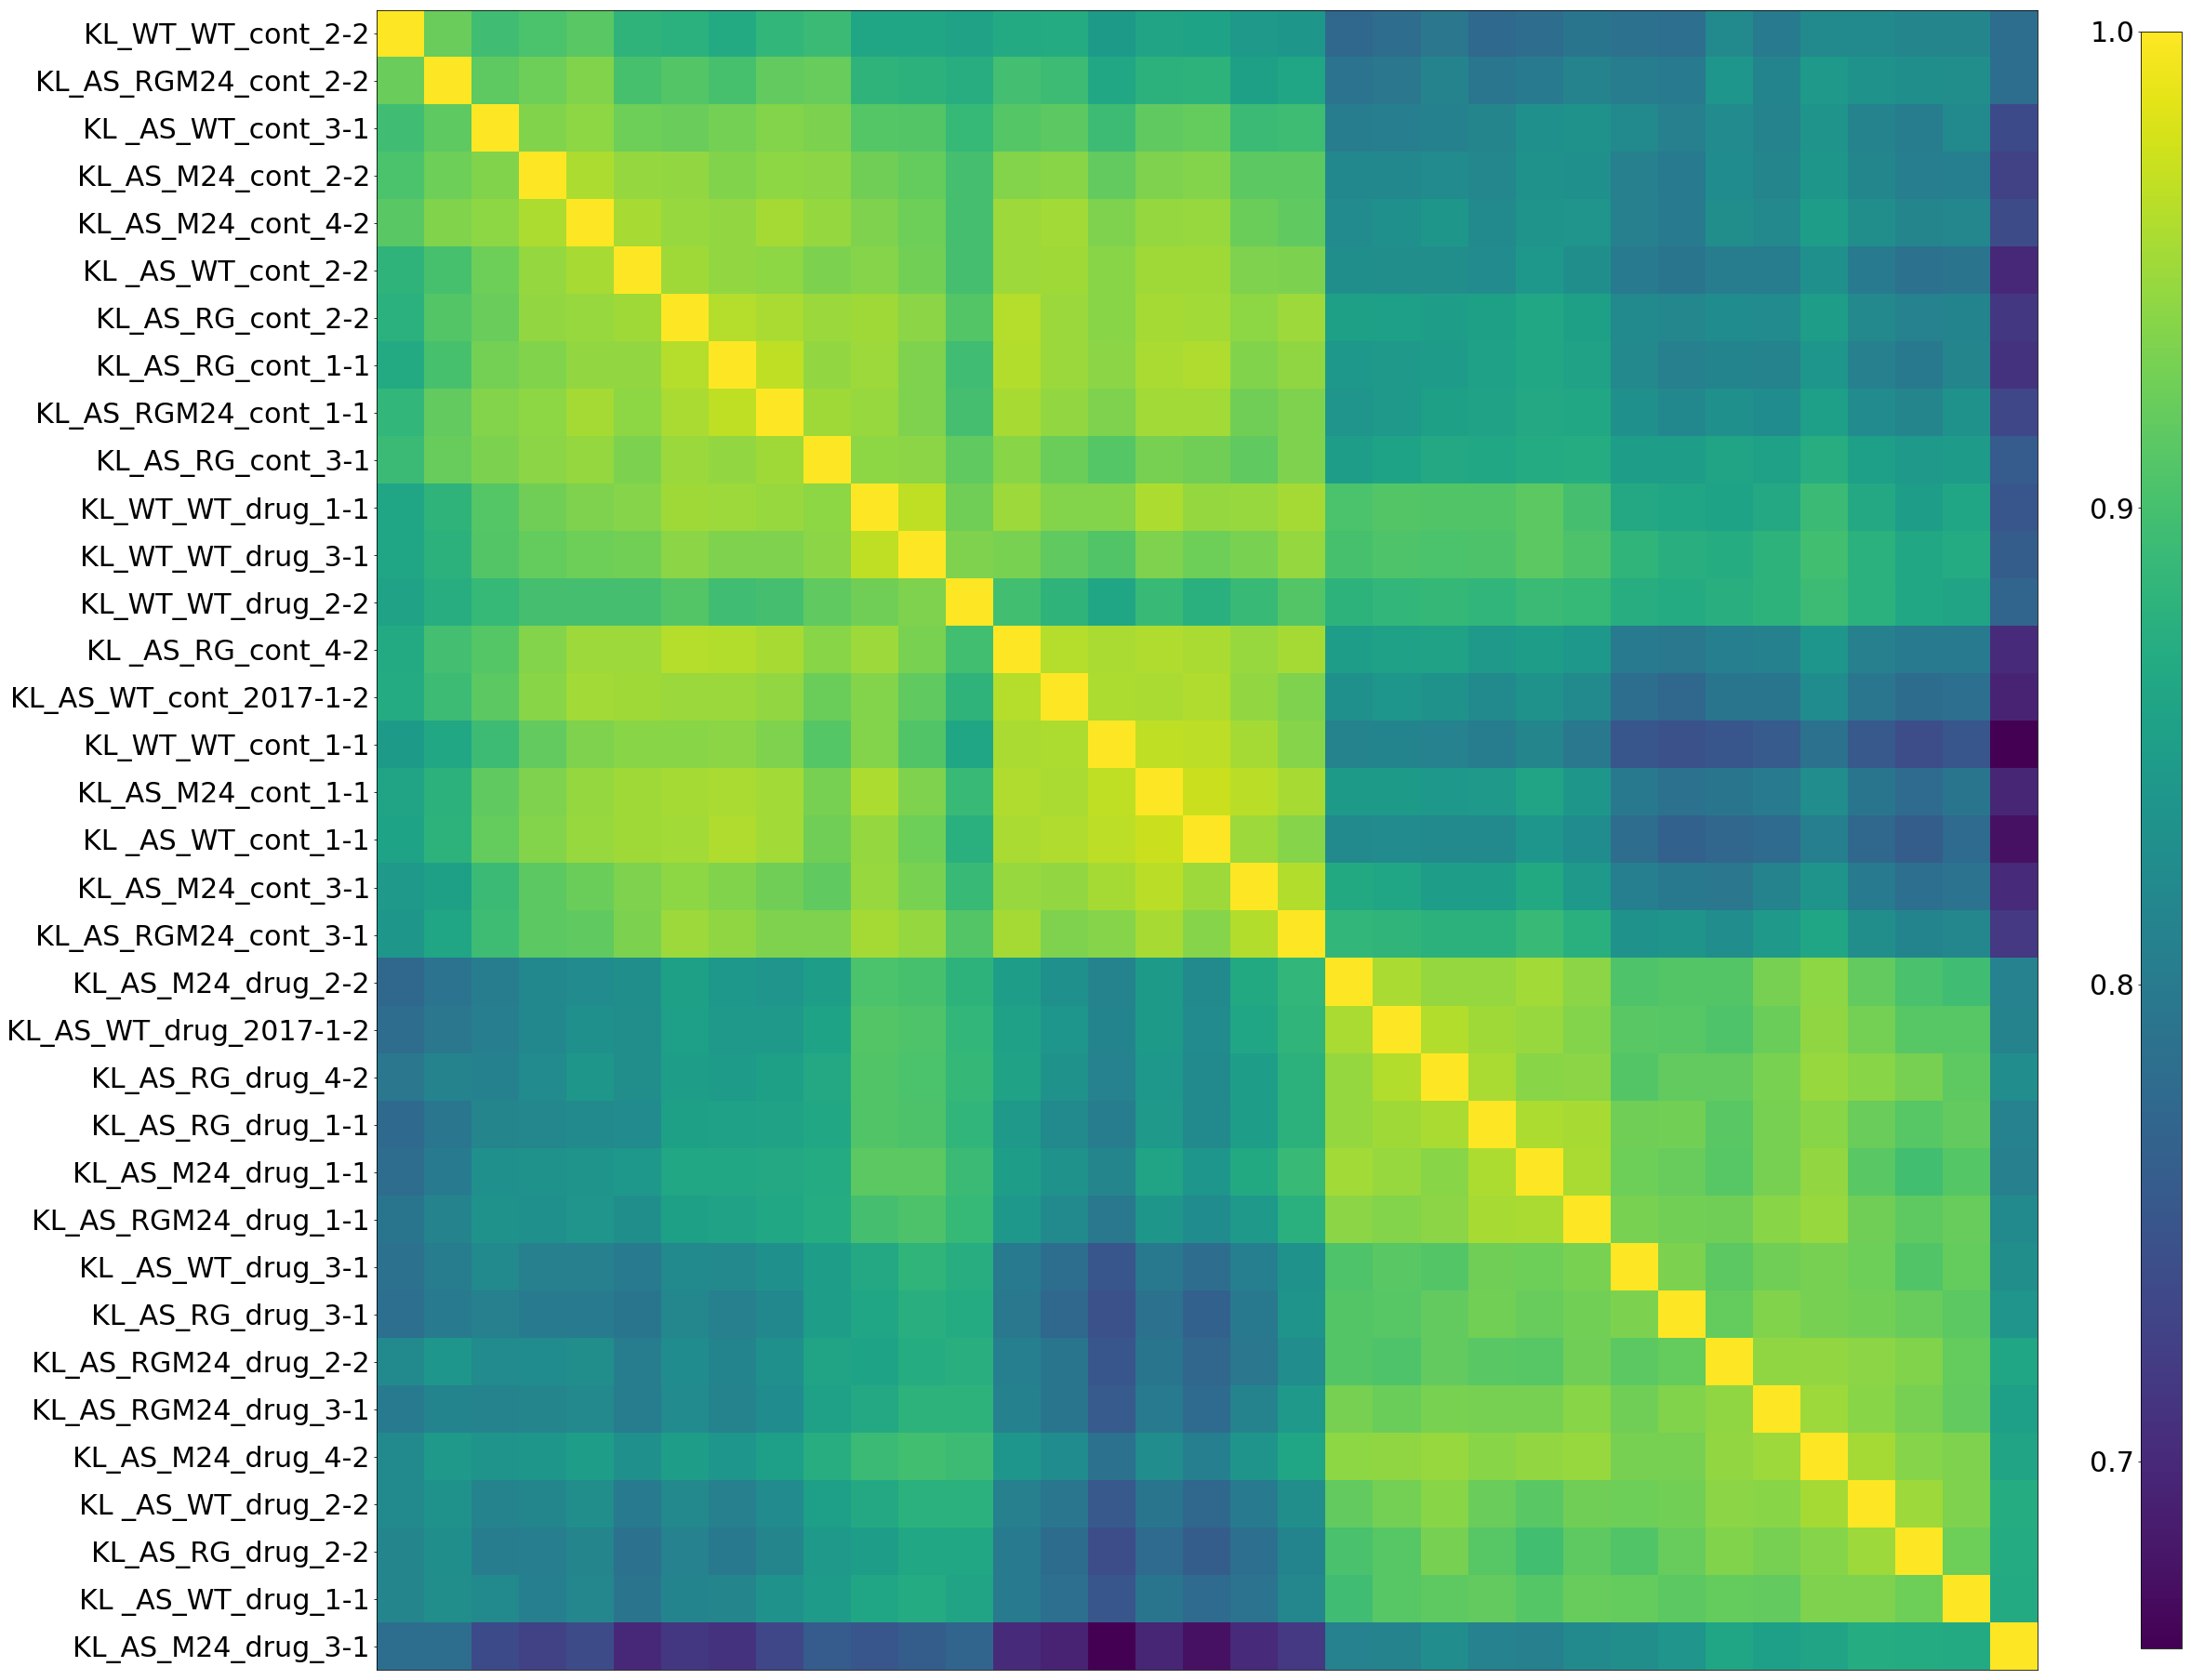

In [43]:
spec = 'KL'
countdata_df = countdata_df_dict[spec]

#normalize by total read number, add pseudocount of 0.1, take log10
total_counts = countdata_df.sum()
total_count_med = total_counts.median()
total_count_max = total_counts.max()
pseudocount = 0.1/total_count_max   #I am using 0.1 times 1/the largest number of counts for a pseudocount ( it all gets multiplied by the median number of counts so all is on the same scale) - thus the pseudocount is 0.1 * the smallest possible value for a single read. 

countdata_df_norm = countdata_df.copy()
for column in countdata_df_norm: 
    countdata_df_norm[column] = (countdata_df[column]/total_counts[column] + pseudocount)*total_count_med
    countdata_df_norm_log = np.log10(countdata_df_norm)

exp_cluster = sch.linkage(countdata_df_norm_log.values.T, method = 'ward', metric = 'euclidean', optimal_ordering=True)
col_dend = sch.dendrogram(exp_cluster)
col_ind_reorder = col_dend['leaves']

old_cols = countdata_df_norm_log.columns.tolist()
new_cols = [old_cols[ind] for ind in col_ind_reorder]

countdata_df_norm_log_clustered = countdata_df_norm_log[new_cols]

# Compute the correlation matrix for the received dataframe
corr = countdata_df_norm_log_clustered.corr()

# Plot the correlation matrix

#for linking column to names
name_dict = metadata_df['long_name'].to_dict()

#for checking to see if clustering correlates with preparation round
prep_round_dict = {}
for index, item in metadata_df[['RNA Extraction', 'RNA Extraction round 2','Library Prep round']].iterrows():
    prep_round_dict[index] = str(item[0]) + '_' + str(item[1]) + '_' + str(item[2])
prep_round_dict

label_lookup = name_dict #prep_round_dict #name_dict
column_names = [label_lookup[int(col)] for col in corr.columns]


fig, ax = plt.subplots(figsize=(40,40))
cax = ax.matshow(corr, cmap='viridis')
plt.xticks([])  #range(len(corr.columns)), column_names, rotation=90);
plt.yticks(range(len(corr.columns)), column_names, fontsize=30);

# Add the colorbar legend
cbar = fig.colorbar(cax, ticks=np.linspace(0.70,1.0,num=4), aspect=40, shrink=.8)
cbar.ax.yaxis.set_tick_params(labelsize=30)
cbar.ax.yaxis.tick_left()


In [42]:
for jj in range(len(corr)): 
    print(corr.columns[jj] + '\t' + column_names[jj])

7079	KL_WT_WT_cont_2-2
7083	KL_AS_RGM24_cont_2-2
7049	KL _AS_WT_cont_3-1
7082	KL_AS_M24_cont_2-2
7029	KL_AS_M24_cont_4-2
7080	KL _AS_WT_cont_2-2
7081	KL_AS_RG_cont_2-2
7019	KL_AS_RG_cont_1-1
7021	KL_AS_RGM24_cont_1-1
7050	KL_AS_RG_cont_3-1
7022	KL_WT_WT_drug_1-1
7053	KL_WT_WT_drug_3-1
7084	KL_WT_WT_drug_2-2
7027	KL _AS_RG_cont_4-2
7031	KL_AS_WT_cont_2017-1-2
7017	KL_WT_WT_cont_1-1
7020	KL_AS_M24_cont_1-1
7018	KL _AS_WT_cont_1-1
7051	KL_AS_M24_cont_3-1
7052	KL_AS_RGM24_cont_3-1
7087	KL_AS_M24_drug_2-2
7032	KL_AS_WT_drug_2017-1-2
7028	KL_AS_RG_drug_4-2
7024	KL_AS_RG_drug_1-1
7025	KL_AS_M24_drug_1-1
7026	KL_AS_RGM24_drug_1-1
7054	KL _AS_WT_drug_3-1
7055	KL_AS_RG_drug_3-1
7088	KL_AS_RGM24_drug_2-2
7075	KL_AS_RGM24_drug_3-1
7030	KL_AS_M24_drug_4-2
7085	KL _AS_WT_drug_2-2
7086	KL_AS_RG_drug_2-2
7023	KL _AS_WT_drug_1-1
7074	KL_AS_M24_drug_3-1


## Check correlation between samples before and after UTR addition


In [4]:
#Load metadata and countdata files

metadata_df = pd.read_csv(data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017\\20181017_metadata_V2_postseq.csv'), index_col = 0)
metadata_df.set_index('I7 index', inplace=True)

spec = 'SC'
countdata_df = pd.read_csv(data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017\\20181017_countdata_' + spec + '.csv'), index_col = 0)
countdata_df_preUTR = pd.read_csv(data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017\\pre_UTR\\20181017_countdata_' + spec + '_preUTR.csv'), index_col = 0)

<IPython.core.display.Javascript object>


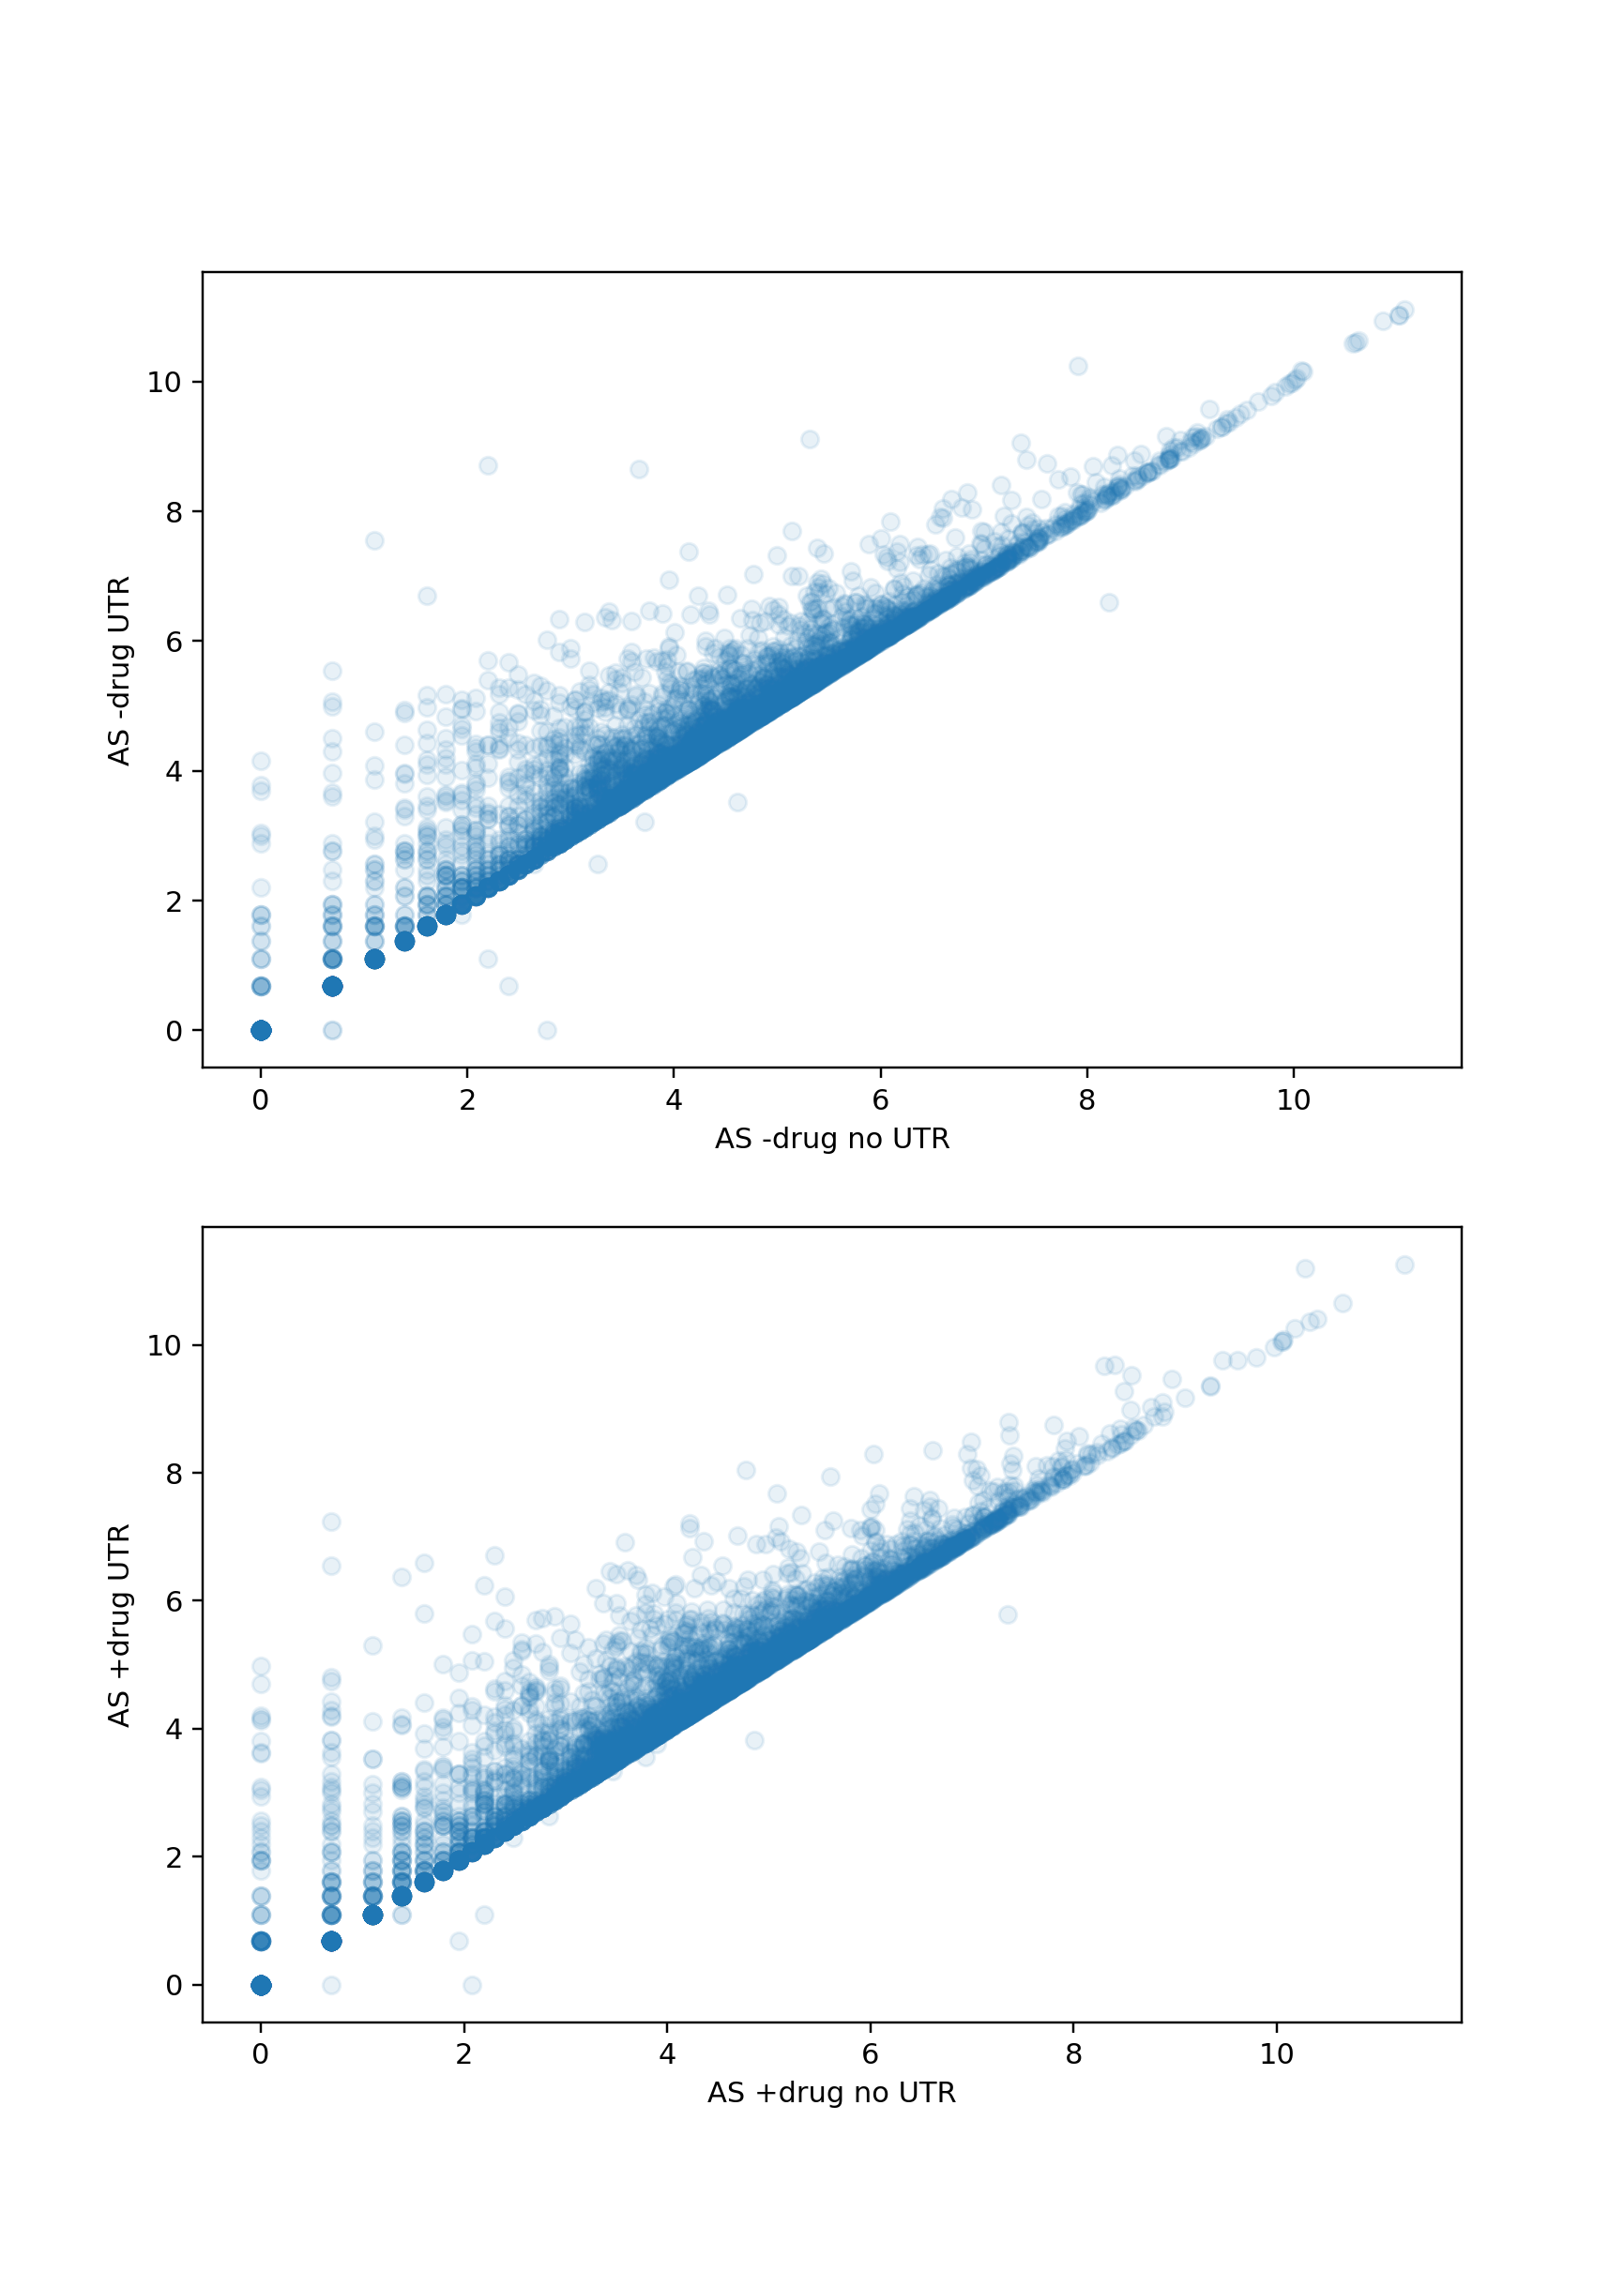

C:\Users\BMH_work\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning:

divide by zero encountered in log



In [10]:
countdata_df_merged = countdata_df.merge(countdata_df_preUTR, how='inner', left_index=True, right_index=True, suffixes=('_UTR', '_preUTR'))

inds_to_check = {'7009': 'AS -drug',
                 '7013': 'AS +drug'}

fig, axarr = plt.subplots(2,1)

jj = 0
for ind,title in inds_to_check.items():
    ax = axarr[jj]
    ax.scatter(np.log(countdata_df_merged.loc[:,ind+'_preUTR']), np.log(countdata_df_merged.loc[:,ind+'_UTR']), alpha = 0.1)
    ax.set_xlabel(title + ' no UTR')
    ax.set_ylabel(title + ' UTR')
    jj = jj+1

In [13]:
io_library.SC_common_name_lookup(countdata_df_merged.index)

['Q0010',
 'Q0017',
 'Q0032',
 'COX1',
 'AI1',
 'AI2',
 'AI3',
 'AI4',
 'AI5_ALPHA',
 'AI5_BETA',
 'ATP8',
 'ATP6',
 'Q0092',
 'COB',
 'BI2',
 'BI3',
 'BI4',
 'OLI1',
 'VAR1',
 'Q0142',
 'Q0143',
 'Q0144',
 'SCEI',
 'Q0182',
 'COX2',
 'Q0255',
 'COX3',
 'Q0297',
 'TFC3',
 'VPS8',
 'EFB1',
 'YAL004W',
 'SSA1',
 'ERP2',
 'FUN14',
 'SPO7',
 'MDM10',
 'SWC3',
 'CYS3',
 'DEP1',
 'SYN8',
 'NTG1',
 'YAL016C-A',
 'YAL016C-B',
 'TPD3',
 'PSK1',
 'LDS1',
 'FUN30',
 'YAL019W-A',
 'ATS1',
 'CCR4',
 'FUN26',
 'PMT2',
 'LTE1',
 'MAK16',
 'DRS2',
 'YAL026C-A',
 'SAW1',
 'FRT2',
 'MYO4',
 'SNC1',
 'GIP4',
 'YAL031W-A',
 'PRP45',
 'POP5',
 'FUN19',
 'YAL034C-B',
 'MTW1',
 'FUN12',
 'RBG1',
 'YAL037C-A',
 'YAL037C-B',
 'YAL037W',
 'CDC19',
 'CYC3',
 'CLN3',
 'CDC24',
 'YAL042C-A',
 'ERV46',
 'PTA1',
 'GCV3',
 'YAL044W-A',
 'YAL045C',
 'AIM1',
 'SPC72',
 'YAL047W-A',
 'GEM1',
 'AIM2',
 'OAF1',
 'FLC2',
 'ACS1',
 'PEX22',
 'YAL056C-A',
 'GPB2',
 'CNE1',
 'YAL059C-A',
 'ECM1',
 'BDH1',
 'BDH2',
 'GDH3',
 '

In [14]:
#plot using plot.ly

spec = 'SC'

inds_to_check = {'7009': 'AS -drug',
                 '7013': 'AS +drug'}

for ind,title in inds_to_check.items():

    data = []

    xlabel = title + ' no UTR'
    ylabel = title + ' UTR'

    trace = pygo.Scatter(
                x = np.log10(countdata_df_merged.loc[:,ind+'_preUTR']), 
                y =  np.log10(countdata_df_merged.loc[:,ind+'_UTR']),
                text = io_library.SC_common_name_lookup(countdata_df_merged.index),
                mode = 'markers',
                marker = {'opacity': 0.5}, #, 
                          #'color': 'rgba'+str(cmap(NN/10))}, 
                name = xlabel + ' vs ' + ylabel 
            )
        
    data.append(trace)

    layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": 'log10 counts' + xlabel
        },
        yaxis= {
            #"range":[-10, 10],
            "title": 'log10 counts' + ylabel
        }
    )


    fig = pygo.Figure(data=data, layout = layout)
    py.iplot(fig, filename= xlabel + '_vs_' + ylabel + '_' + spec + '_log10_counts')


C:\Users\BMH_work\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

divide by zero encountered in log10

C:\Users\BMH_work\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

divide by zero encountered in log10

